In [1]:
import pandas as pd

housing_df = pd.read_csv("DataSets/USA_Housing.csv")

print('--'*25)
print(f"USA Housing DataSet : (rows, cols) = {housing_df.shape}")
print('--'*25)

print("Info: ")
housing_df.info()

print("\nTop 5 rows: ")
housing_df.head()

--------------------------------------------------
USA Housing DataSet : (rows, cols) = (5000, 6)
--------------------------------------------------
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area Income          5000 non-null   float64
 1   Area House Age       5000 non-null   float64
 2   Area No of Rooms     5000 non-null   float64
 3   Area No of Bedrooms  5000 non-null   float64
 4   Area Population      5000 non-null   float64
 5   Price                5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB

Top 5 rows: 


,Area Income,Area House Age,Area No of Rooms,Area No of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [2]:
#Check null rows
housing_df.isnull().sum()

Area Income            0
Area House Age         0
Area No of Rooms       0
Area No of Bedrooms    0
Area Population        0
Price                  0
dtype: int64

In [3]:
#Get 5 number summary
housing_df.describe()

,Area Income,Area House Age,Area No of Rooms,Area No of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [4]:
# 1. Split
x = housing_df.drop('Price', axis=1)
y = housing_df['Price']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=101)


In [7]:
# 2. Fit
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 3. Predict
y_pred = lin_reg.predict(x_test)

y_pred

array([1257919.729243  ,  822112.41868756, 1740669.05869474,
        972452.12926804,  993422.2632988 ,  644126.07416935,
       1073911.79097589,  856584.00208537, 1445318.25527738,
       1204342.19071515, 1455792.46233196, 1298556.65691754,
       1735924.33854636, 1336925.77593212, 1387637.43241543,
       1222403.77757898,  613786.28673738,  963933.54403085,
       1221197.33061287, 1198071.57580528,  505861.89541388,
       1769106.54726586, 1853881.16845511, 1200369.50514846,
       1065129.12845899, 1812033.73048156, 1768686.47104264,
       1439920.83823817, 1387251.9966963 , 1541178.39227172,
        726418.80525623, 1754497.609143  , 1462185.72661629,
       1025600.16064332, 1284926.86862687,  917454.59581447,
       1187046.94951786,  999330.91123324, 1329536.63408979,
        782191.60431848, 1393272.03057332,  578216.88372019,
        822643.37151103, 1895533.11423643, 1672019.84904555,
        966926.45430148, 1129674.55621678,  792797.75924288,
       1161057.18404066,

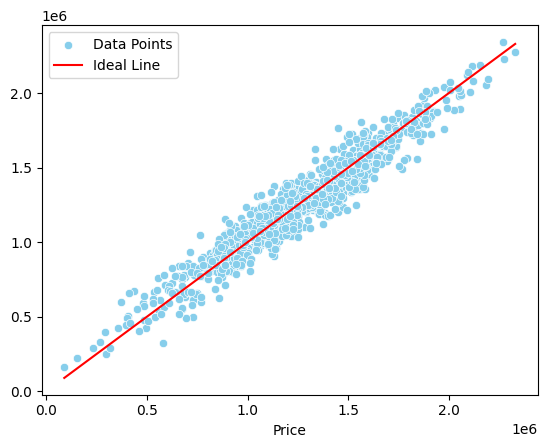

In [ ]:
# lets draw scatterplot with line
# for linear regression we have a line across data points
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred, color="skyBlue", label="Data Points")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", label="Ideal Line")
plt.legend()


In [54]:
print("+-----------------+-----------------+------------+")
print("|  Actual Value   | Predicted Value |    Diff    |")
print("+-----------------+-----------------+------------+")

for i in range(len(y_test)):
    actual = y_test.iloc[i]      # positional access for pandas Series
    pred = y_pred[i]             # numpy array access
    diff = actual - pred
    print(f"| {actual:<15.2f} | {pred:<15.2f} | {diff:<10.2f} |")

print("+-----------------+-----------------+------------+")


+-----------------+-----------------+------------+
|  Actual Value   | Predicted Value |    Diff    |
+-----------------+-----------------+------------+
| 1251688.62      | 1257919.73      | -6231.11   |
| 873048.32       | 822112.42       | 50935.90   |
| 1696977.66      | 1740669.06      | -43691.40  |
| 1063964.29      | 972452.13       | 91512.16   |
| 948788.28       | 993422.26       | -44633.99  |
| 730043.65       | 644126.07       | 85917.57   |
| 1166925.15      | 1073911.79      | 93013.36   |
| 705444.12       | 856584.00       | -151139.89 |
| 1499988.88      | 1445318.26      | 54670.62   |
| 1288199.15      | 1204342.19      | 83856.96   |
| 1441736.76      | 1455792.46      | -14055.70  |
| 1279681.15      | 1298556.66      | -18875.50  |
| 1754969.16      | 1735924.34      | 19044.82   |
| 1511653.46      | 1336925.78      | 174727.68  |
| 1441956.20      | 1387637.43      | 54318.77   |
| 1119992.62      | 1222403.78      | -102411.16 |
| 727866.53       | 613786.29  

In [56]:
# Residual Analysis

residual = y_test - y_pred.reshape(-1)
residual

1718     -6231.113243
2511     50935.900912
345     -43691.395695
2521     91512.158732
54      -44633.987599
            ...      
3900      8578.803011
3753   -104601.289622
3582     38997.150463
2392   -155113.478263
3343     90915.992340
Name: Price, Length: 1000, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

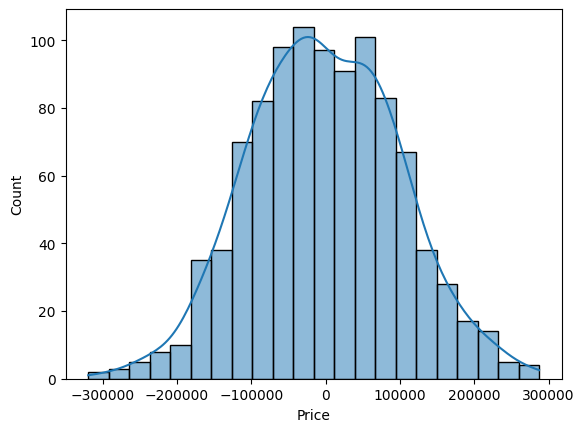

In [66]:
sns.histplot(residual, kde=True) #distributed plot to check bull curve

# As height of bars are high, so we are far from zero, means our model is not correct

In [70]:
# ScoreIt

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Linear Regression: MSE")
print ('- -' * 10)
print("mse: ", mse)
print("root of mse, rmse: ", rmse)

Linear Regression: MSE
- -- -- -- -- -- -- -- -- -- -
mse:  10100187856.996006
root of mse, rmse:  100499.69083035034
